In [1]:
import pandas as pd

# Use raw string to avoid issues with backslashes
df = pd.read_csv(r'C:\Users\Nishtha Singh\Downloads\Titanic-Dataset.csv')

# View basic structure
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

In [2]:
# Summary statistics
summary_stats = df.describe()

# Median values
median_values = df.median(numeric_only=True)

# Count missing values per column
missing_values = df.isnull().sum()

print("Summary Statistics:\n", summary_stats)
print("\nMedian Values:\n", median_values)
print("\nMissing Values:\n", missing_values)


Summary Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Median Values:
 PassengerId    446.0000
Survived         0.

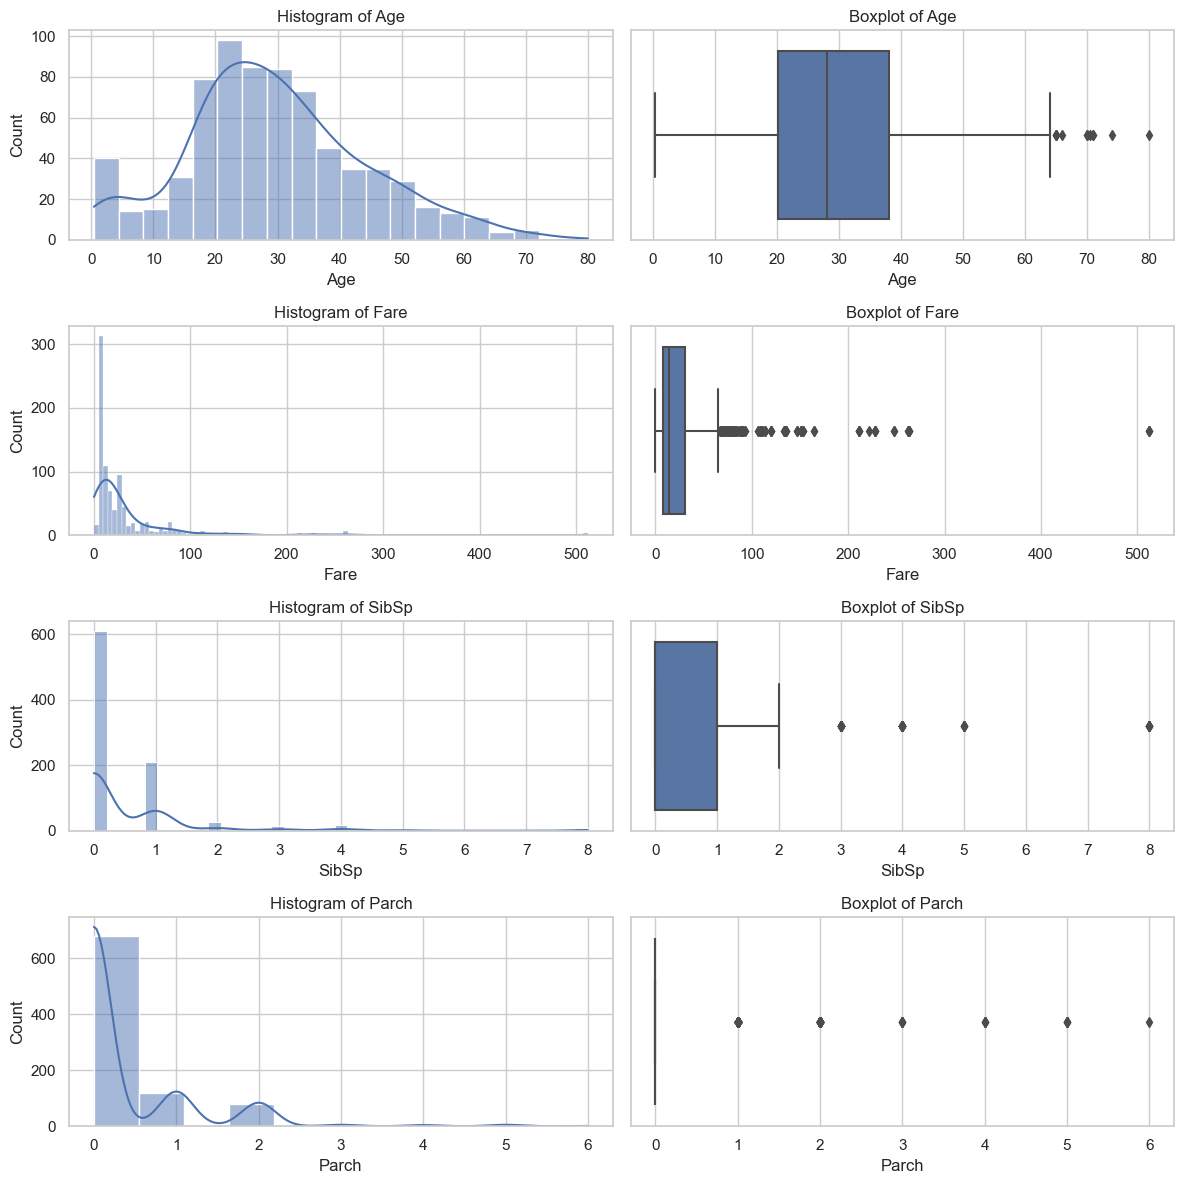

In [4]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv(r'C:\Users\Nishtha Singh\Downloads\Titanic-Dataset.csv')
warnings.filterwarnings("ignore", category=FutureWarning)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

sns.set(style="whitegrid")
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(12, 12))

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col].dropna(), ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {col}')
    
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


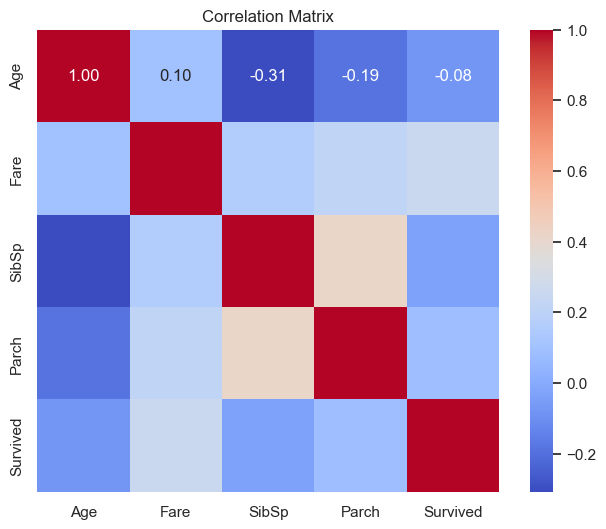

In [5]:
# Correlation matrix
corr_matrix = df[numeric_cols + ['Survived']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()


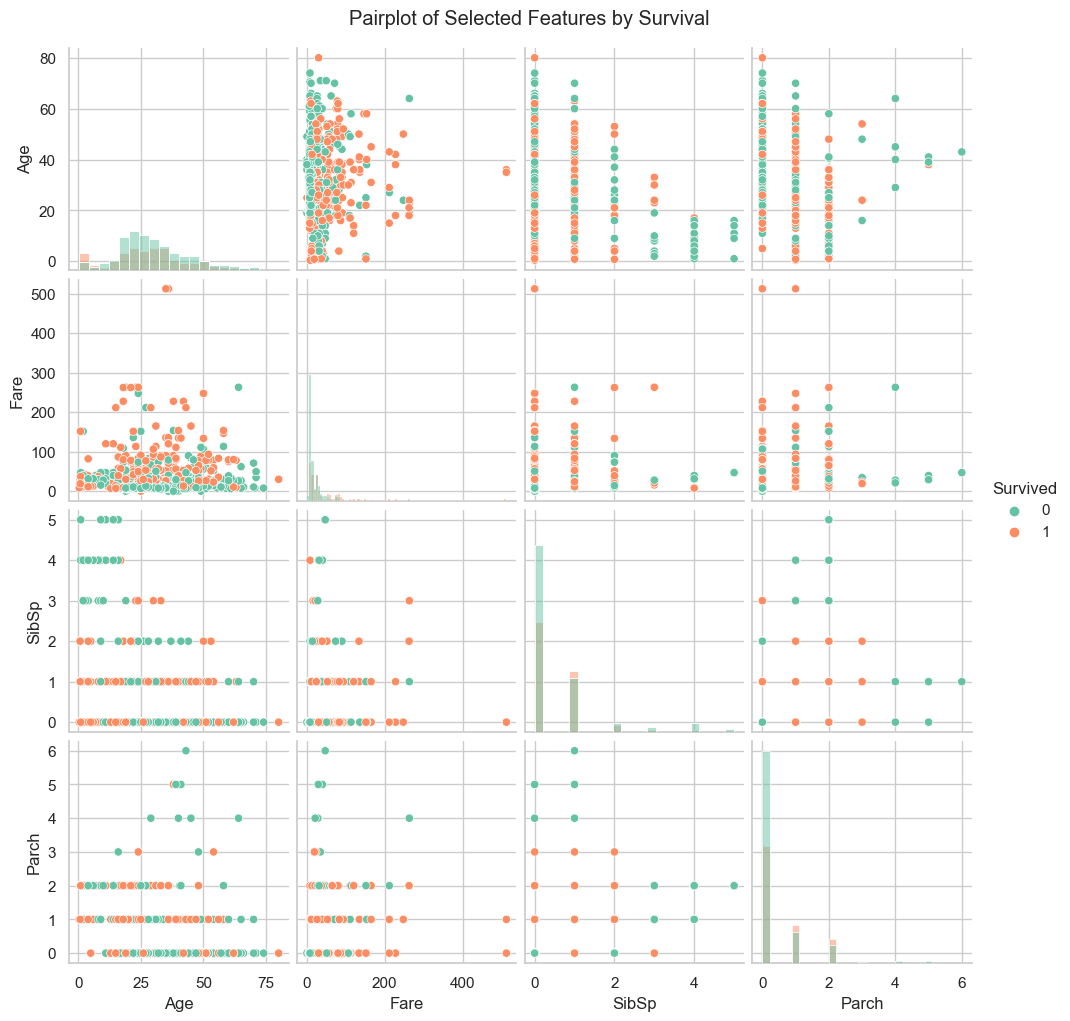

In [7]:
subset = df[['Survived', 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch']]
subset_clean = subset.dropna().copy()
subset_clean['Pclass'] = subset_clean['Pclass'].astype(str)

sns.pairplot(subset_clean, hue='Survived', palette='Set2', diag_kind='hist')
plt.suptitle("Pairplot of Selected Features by Survival", y=1.02)
plt.show()